In [2]:
import torch 
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt 
import os 
from PIL import Image



/Users/zekariamohamed/anaconda3/envs/yolov10/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


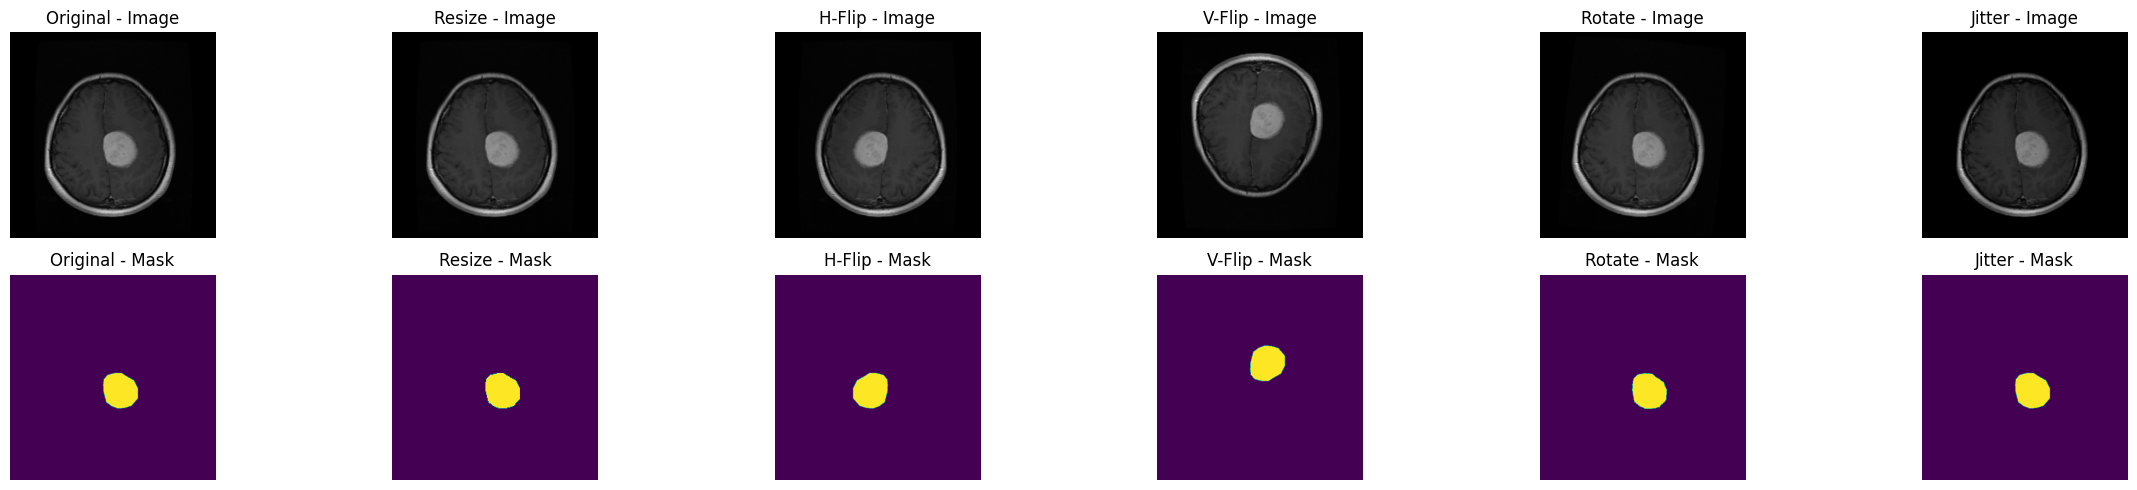

In [21]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

image = cv2.imread("../Data/images/11.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread("../Data/masks/11.png", cv2.IMREAD_GRAYSCALE)

transformations = [
    ("Original", None), 
    ("Resize", A.Resize(256, 256)),
    ("H-Flip", A.HorizontalFlip(p=1.0)), 
    ("V-Flip", A.VerticalFlip(p=1.0)), 
    ("Rotate", A.Rotate(limit=10, p=1.0)), 
    ("Jitter", A.ColorJitter(brightness=0.5, contrast=0.5, p=1.0))
]


fig, axes = plt.subplots(2, len(transformations), figsize = (4 * len(transformations), 5))

for i, (name, transform) in enumerate(transformations): 
    if transform is None: 
        transformed_img = image
        transformed_mask = mask
    else: 
        augmented = transform(image=image, mask =mask)
        transformed_img = augmented['image']
        transformed_mask = augmented['mask']
    axes[0, i].imshow(transformed_img)
    axes[0, i].set_title(f"{name} - Image")
    axes[0, i].axis('off')
    
   
    axes[1, i].imshow(transformed_mask, cmap="viridis")
    axes[1, i].set_title(f"{name} - Mask")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()
